In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from dataset_benchmark.datasets import NpzBenchmarkDataset, HfArrowBenchmarkDataset, Hdf5BenchmarkDatset
from dataset_benchmark.evaluation import benchmark_batched_loading

In [2]:
results_batched_dataloading, baseline_times = benchmark_batched_loading(
    dataset_classes=[NpzBenchmarkDataset, Hdf5BenchmarkDatset],
    n_rows=1000,
    n_values_per_row=1_000_000,
    batch_sizes=[1, 4, 8, 16, 32],
    shuffle=[True, False],
    n_dataloader_workers=[0, 2, 4, 8, 16],
    dataloder_pin_memory=[True, False],
    max_dataset_size=100_000_000_000,
    max_batch_size=4_000_000_000,
    n_repeats=2,
    dataset_init_kwargs=None,
)

df_batched = pd.DataFrame(results_batched_dataloading)
df_batched["total_bytes"] = df_batched["n_rows"] * df_batched["n_values_per_row"] * 8
df_batched["mb_per_second"] = df_batched["total_bytes"] / df_batched["time"] / 1_000_000
df_batched["rows_per_second"] = df_batched["n_rows"] / df_batched["time"]

baseline_times = np.array(baseline_times)
baseline_mb_per_second = df_batched["total_bytes"].iloc[0] / baseline_times / 1_000_000
baseline_rows_per_second = df_batched["n_rows"].iloc[0] / baseline_times

dataset_class:   0%|          | 0/2 [00:00<?, ?it/s]





















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































baseline times: [5.99788857 1.0567162 ]
baseline_mb_per_second: [1333.80270627 7570.62300367]
baseline_rows_per_second: [166.72533828 946.32787546]


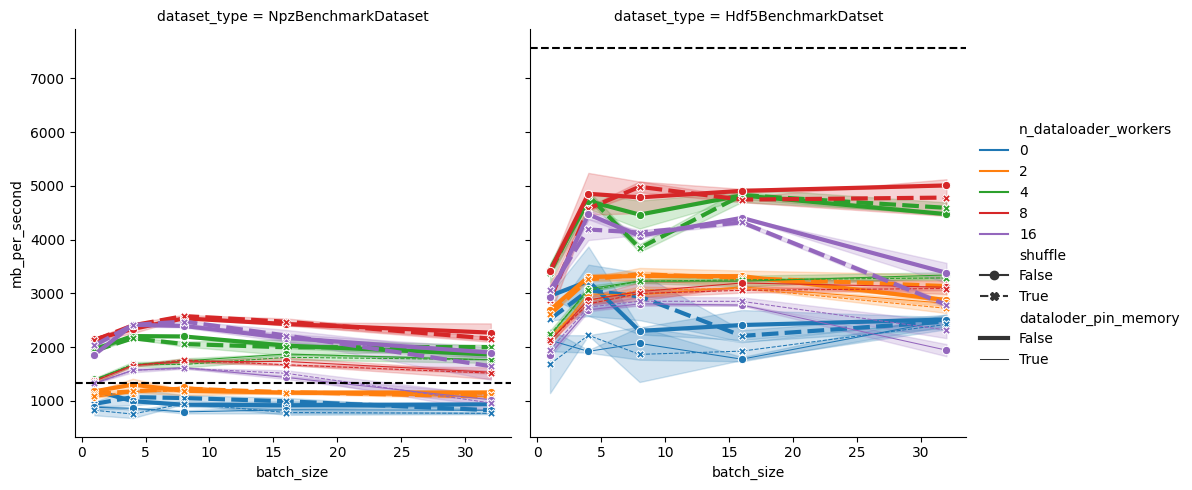

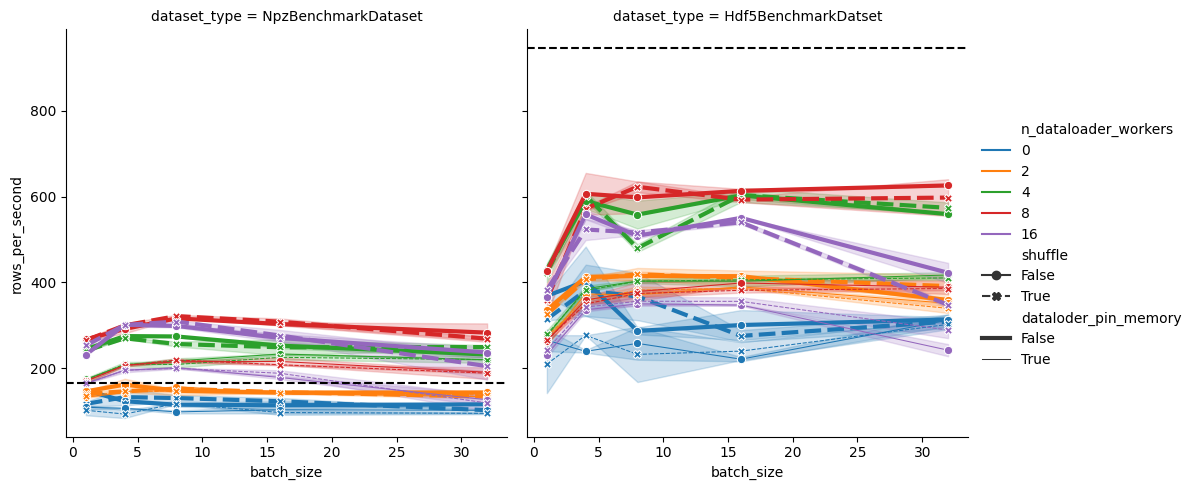

In [6]:
# visualize the results for the batched loading

mb_per_second_facet_grid = sns.relplot(
    data=df_batched,
    x="batch_size",
    y="mb_per_second",
    hue=df_batched["n_dataloader_workers"].astype(str),
    style="shuffle",
    size="dataloder_pin_memory",
    errorbar=("pi", 100),
    markers=True,
    col="dataset_type",
    kind="line",

)
# add the baseline_mb_per_second baseline as a horizontal line per column axes
for i_dataset in range(len(df_batched["dataset_type"].unique())):
    for measure in baseline_mb_per_second[i_dataset]:
        mb_per_second_facet_grid.axes[0, i_dataset].axhline(measure, color="black", linestyle="--")
plt.show()

rows_per_second_facet_grid = sns.relplot(
    data=df_batched,
    x="batch_size",
    y="rows_per_second",
    hue=df_batched["n_dataloader_workers"].astype(str),
    style="shuffle",
    size="dataloder_pin_memory",
    errorbar=("pi", 100),
    markers=True,
    col="dataset_type",
    kind="line",
)
# add the baseline_mb_per_second baseline as a horizontal line per column axes
for i_dataset in range(len(df_batched["dataset_type"].unique())):
    for measure in baseline_rows_per_second[i_dataset]:
        rows_per_second_facet_grid.axes[0, i_dataset].axhline(measure, color="black", linestyle="--")
plt.show()



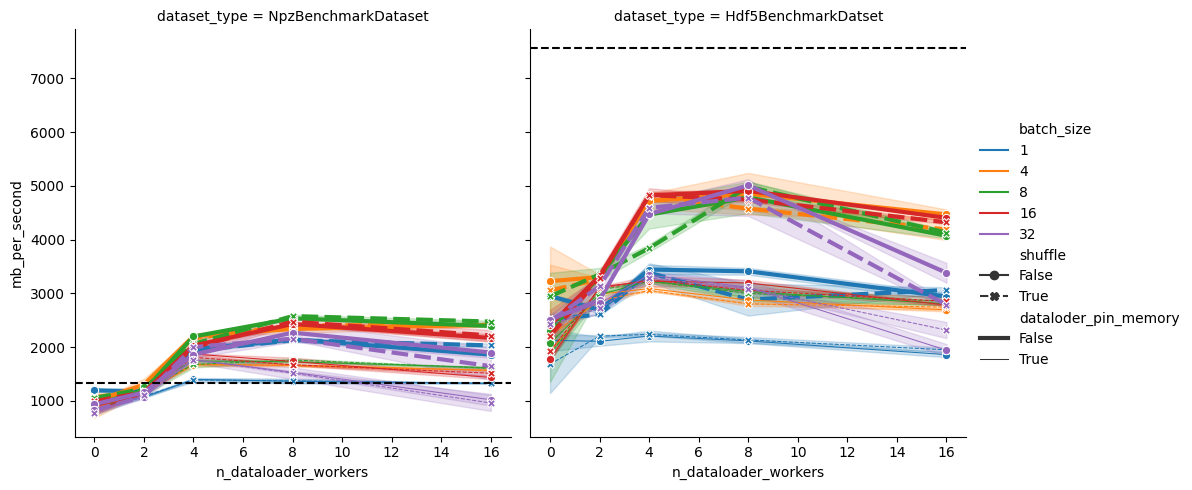

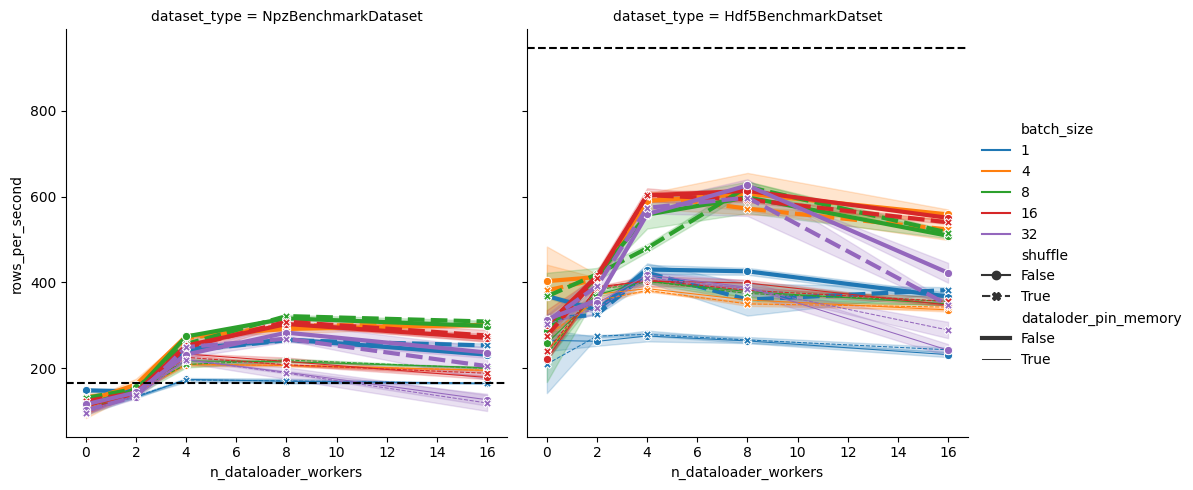

In [9]:
mb_per_second_facet_grid = sns.relplot(
    data=df_batched,
    x="n_dataloader_workers",
    y="mb_per_second",
    hue=df_batched["batch_size"].astype(str),
    style="shuffle",
    size="dataloder_pin_memory",
    errorbar=("pi", 100),
    markers=True,
    col="dataset_type",
    kind="line",

)
# add the baseline_mb_per_second baseline as a horizontal line per column axes
mb_per_second_facet_grid.axes[0, 0].axhline(baseline_mb_per_second[0], color="black", linestyle="--")
mb_per_second_facet_grid.axes[0, 1].axhline(baseline_mb_per_second[1], color="black", linestyle="--")
plt.show()

rows_per_second_facet_grid = sns.relplot(
    data=df_batched,
    x="n_dataloader_workers",
    y="rows_per_second",
    hue=df_batched["batch_size"].astype(str),
    style="shuffle",
    size="dataloder_pin_memory",
    errorbar=("pi", 100),
    markers=True,
    col="dataset_type",
    kind="line",
)
# add the baseline_mb_per_second baseline as a horizontal line per column axes
rows_per_second_facet_grid.axes[0, 0].axhline(baseline_rows_per_second[0], color="black", linestyle="--")
rows_per_second_facet_grid.axes[0, 1].axhline(baseline_rows_per_second[1], color="black", linestyle="--")
plt.show()